In [5]:
import pandas as pd

df = pd.read_csv("C:/Users/shruti/OneDrive/Desktop/ml lab/loan_data.csv")
df.head()

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit.policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int.rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log.annual.inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days.with.cr.line  100 non-null    float64
 9   revol.bal          100 non-null    int64  
 10  revol.util         100 non-null    float64
 11  inq.last.6mths     100 non-null    int64  
 12  delinq.2yrs        100 non-null    int64  
 13  pub.rec            100 non-null    int64  
 14  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


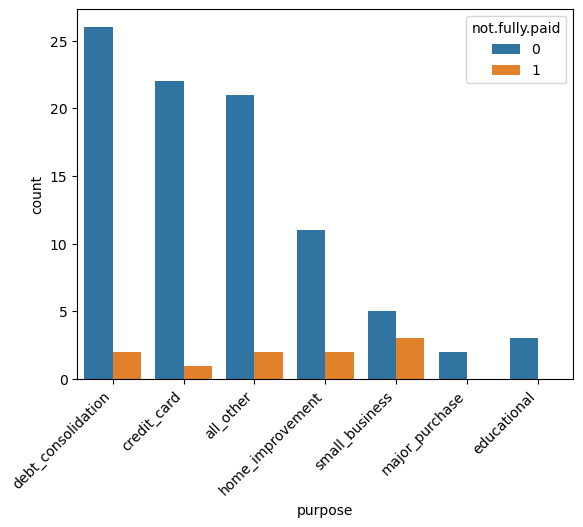

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

In [10]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [11]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.27, random_state=125)

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [25]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8518518518518519
F1 Score: 0.92


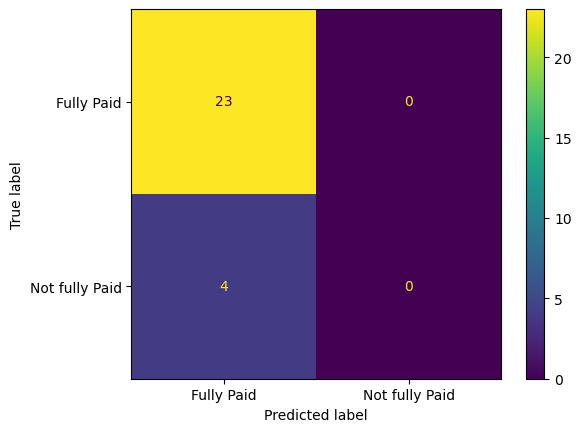

In [27]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [29]:
#Confusion Metrix
print(cm)

[[23  0]
 [ 4  0]]


In [31]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8518518518518519
F1 Score: 0.92


In [33]:
from sklearn.naive_bayes import MultinomialNB

multi_model = MultinomialNB()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_multi))
print("MultinomialNB F1 Score:", f1_score(y_test, y_pred_multi, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))

MultinomialNB Accuracy: 0.5925925925925926
MultinomialNB F1 Score: 0.6510921177587845

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72        23
           1       0.18      0.50      0.27         4

    accuracy                           0.59        27
   macro avg       0.53      0.55      0.49        27
weighted avg       0.77      0.59      0.65        27



In [35]:
from sklearn.naive_bayes import BernoulliNB

bern_model = BernoulliNB()
bern_model.fit(X_train, y_train)

y_pred_bern = bern_model.predict(X_test)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bern))
print("BernoulliNB F1 Score:", f1_score(y_test, y_pred_bern, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bern))

BernoulliNB Accuracy: 0.8518518518518519
BernoulliNB F1 Score: 0.7837037037037037

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       0.00      0.00      0.00         4

    accuracy                           0.85        27
   macro avg       0.43      0.50      0.46        27
weighted avg       0.73      0.85      0.78        27



C:\Users\shruti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shruti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shruti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
